__ Ejercicio 2 (Puntos extra):__ Resolver ecuación de Poisson unidimensional con $\rho (x)=\cos(x)$, en el dominio $[0,2 \pi]$, utilizando una malla con 12 puntos. Aquí nuevamente hay 10 incognitas, sin embargo note que para el método es mas conveniente definir $\vec f$ incluyendo las condiciones de frontera.

In [1]:
using SymPy
using PyPlot

In [2]:
f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10=Sym("f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10")

(f_1, f_2, f_3, f_4, f_5, f_6, f_7, f_8, f_9, f_10)

In [3]:
#definimos a nuestra función f junto con las condiciones de frontera
f=[0 f_1 f_2 f_3 f_4 f_5 f_6 f_7 f_8 f_9 f_10 0]

1×12 Array{SymPy.Sym,2}:
 0  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  f_9  f_10  0

Teniendo que la forma discretizada de la ecuacion de Poisson en una dimension es:
$$f_{i+1}+f_{i-1}-2f_{i}-h{x}\rho_{i}= 0$$

En este caso escogemos a $h$ de la siguiente forma $\frac{x_f-x_0}{puntos}$ entonces $$h_x=\frac{2\pi}{12}$$

In [4]:
#definimos h
h=2*pi/11

#malla con 12 puntos en el intervalo seleccionado
malla=linspace(0,2pi,12)

PM=[]
b=[]

for i in 2:11
    #forma discretizada de la Ec de Poisson
    r=f[i+1]+f[i-1]-2f[i]-h*cos(malla[i])
    push!(PM,r)
end

for i in 1:10
    bP=PM[i](f_1=>0,f_2=>0,f_3=>0,f_4=>0,f_5=>0,f_6=>0,f_7=>0,f_8=>0,f_9=>0,f_10=>0)
    push!(b,bP)
end


In [5]:
#despliega nuestro sistema de Ec
PM

10-element Array{Any,1}:
       -2*f_1 + f_2 - 0.480522894281618
  f_1 - 2*f_2 + f_3 - 0.237284500552297
  f_2 - 2*f_3 + f_4 + 0.081290045530213
  f_3 - 2*f_4 + f_5 + 0.374055576524896
  f_4 - 2*f_5 + f_6 + 0.548061104923333
  f_5 - 2*f_6 + f_7 + 0.548061104923333
  f_6 - 2*f_7 + f_8 + 0.374055576524896
 f_7 - 2*f_8 + f_9 + 0.0812900455302132
 f_10 + f_8 - 2*f_9 - 0.237284500552297
      -2*f_10 + f_9 - 0.480522894281618

In [6]:
#empleamos el Jacobiano para poder obtener la Matriz

function Jacobiano(f,var,n,m)
J=zeros(n,m)
    for i in 1:n
        for j in 1:m
        J[i,j]=diff(f[i],var[j])
        end
    end
    J
end

Jacobiano (generic function with 1 method)

In [7]:
v=[f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10]

#obtenemos la Matriz
A=Jacobiano(PM,v,10,10)

10×10 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  -2.0

In [8]:
#En este celda, desplegamos nuestro vector
b

10-element Array{Any,1}:
 -0.480522894281618
 -0.237284500552297
 0.0812900455302130
  0.374055576524896
  0.548061104923333
  0.548061104923333
  0.374055576524896
 0.0812900455302132
 -0.237284500552297
 -0.480522894281618

In [9]:
#Tenemos que la solución está dada por
solucion = -inv(A)*b

10-element Array{Any,1}:
 0.285599332144527
  1.05172155857067
  2.05512828554911
  2.97724496699734
  3.52530607192068
  3.52530607192068
  2.97724496699734
  2.05512828554911
  1.05172155857067
 0.285599332144527

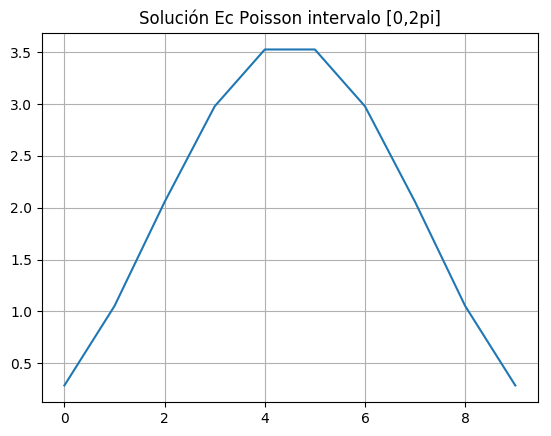

In [10]:
plot(solucion)
title("Solución Ec Poisson intervalo [0,2pi]")
grid()
;

__Ejercicio 3 (Puntos extra):__ Resolver ecuación de calor en una dimensión, en el dominio $[0,1]$, con $f(0)=10$, $f(1)=0$, en una malla con 12 puntos. Aqui obviamente habrá 10 incognitas: $f_1, \dots, f_{10}$. La condición inicial que deberán usar es $\vec f^{[0]}=(5,4,3,2,1,3,5,7,7,8)^{\text{T}}$.
* Utilizando método de Euler.
* Utilizando Runge-Kutta de orden 4.
* Puede hacer este ejercicio construyendo $A$ y $\vec b$, para así utilizar las rutinas que ya tienen de RK4 y Euler, noten que aqui $A\vec f +\vec b$ define la función del sistema dinámico de $n=10$ dimensiones.
* La otra opción es implementar una rutina que aplique el laplaciano discreto a $\vec f$, digamos $\vec r= D_{h_x}[\vec f]$, de esta forma es facil construir la función que define el sistema dinámico en cada paso.
* Graficar en varios tiempos (no en todos en caso de que hagan una partición grande, solo los primeros tiempos y los últimos).

En este caso tendremos que
$$f_{i+1}+f_{i-1}-2f_i-h_x\frac{df}{dx}=0$$

In [11]:
#volvemos a defini h
h=(1)/(12)

#de igual forma nuestra malla
mmalla=linspace(0,1,12)
PM=[]
b=[]

df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10=Sym("df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10")
#df=[df_1 df_2 df_3 df_4 df_5 df_6 df_7 df_8 df_9 df_10]
f=[0 f_1 f_2 f_3 f_4 f_5 f_6 f_7 f_8 f_9 f_10 0]

for i in 2:11
    #discretización
    r=(f[i+1]+f[i-1]-2f[i])/h
    push!(PM,r)
end

for i in 1:10
    bP=PM[i](f_1=>0,f_2=>0,f_3=>0,f_4=>0,f_5=>0,f_6=>0,f_7=>0,f_8=>0,f_9=>0,f_10=>0)
    push!(b,bP)
end 

In [12]:
#obtenemos el sistema de ecuaciones para después aplicar los métodos de reolución
varP=[f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10];
PM

10-element Array{Any,1}:
            -24.0*f_1 + 12.0*f_2
  12.0*f_1 - 24.0*f_2 + 12.0*f_3
  12.0*f_2 - 24.0*f_3 + 12.0*f_4
  12.0*f_3 - 24.0*f_4 + 12.0*f_5
  12.0*f_4 - 24.0*f_5 + 12.0*f_6
  12.0*f_5 - 24.0*f_6 + 12.0*f_7
  12.0*f_6 - 24.0*f_7 + 12.0*f_8
  12.0*f_7 - 24.0*f_8 + 12.0*f_9
 12.0*f_10 + 12.0*f_8 - 24.0*f_9
           -24.0*f_10 + 12.0*f_9

In [13]:
#condición inicial
XI=[5.0,4.0,3.0,2.0,1.0,3.0,5.0,7.0,7.0,8.0]

10-element Array{Float64,1}:
 5.0
 4.0
 3.0
 2.0
 1.0
 3.0
 5.0
 7.0
 7.0
 8.0

In [14]:
#definimos nuestro sistema de ecuaciones
S(x,t)=[-24.0*x[1]+12.0*x[2],12.0*x[1]-24.0*x[2]+12.0*x[3],
    12.0*x[2] - 24.0*x[3] + 12.0*x[4],12.0*x[3] - 24.0*x[4] + 12.0*x[5],
    12.0*x[4] - 24.0*x[5] + 12.0*x[6],12.0*x[5] - 24.0*x[6] + 12.0*x[7],
    12.0*x[6] - 24.0*x[7] + 12.0*x[8],12.0*x[7] - 24.0*x[8] + 12.0*x[9],
    12.0*x[10] + 21.0*x[8] - 24.0*x[9],-24.0*x[10] + 12.0*x[9]]


S (generic function with 1 method)

In [15]:
include("herramientas.jl")

herramientas

In [16]:
solución=herramientas.Runge_Kutta_4(S,XI,0.0,2*pi,0.001);

Para esta variable "solución", el arreglo interno que posee, que nos interesa es el segundo, ya que en este se presentan los valores de las variables en un tiempo dado

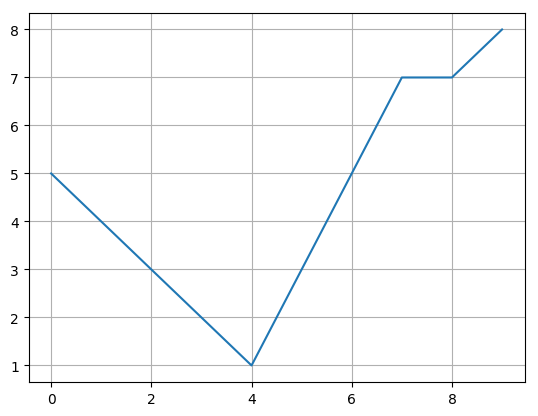

In [17]:
plot(solución[2][1]),

grid();

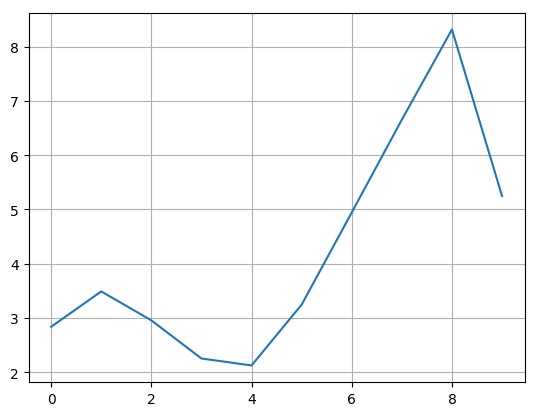

In [18]:
plot(solución[2][50])
grid();

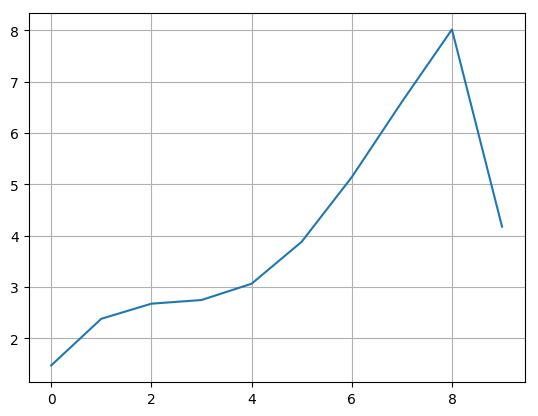

In [19]:
plot(solución[2][150])
grid();

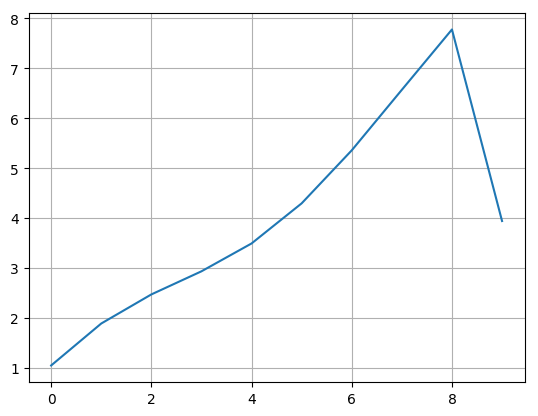

In [20]:
plot(solución[2][250])
grid();

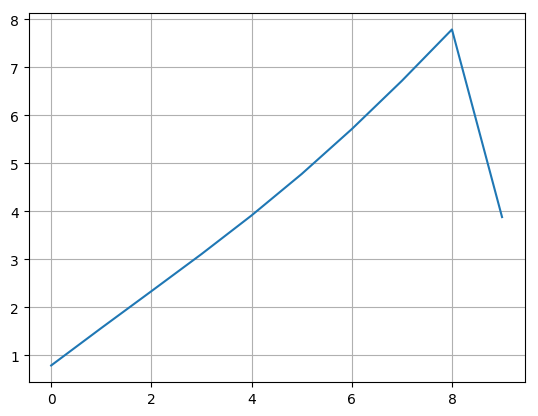

In [21]:
plot(solución[2][550])
grid();

In [22]:
#ahora utilizaremos el Método de Euler
solución1=herramientas.Euler(S,XI,0.0,2*pi,0.001);

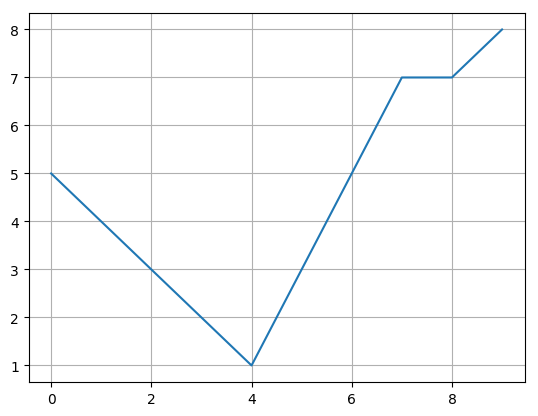

In [23]:
plot(solución1[2][1])
grid();

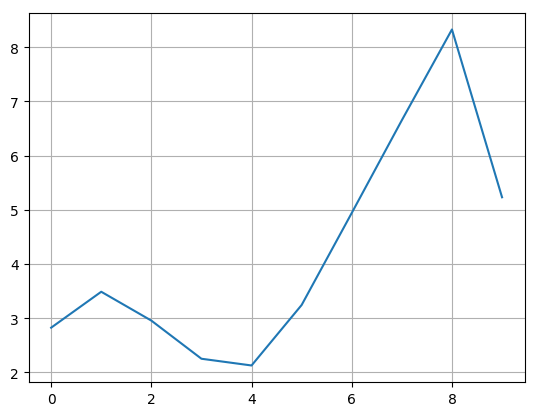

In [24]:
plot(solución1[2][50])
grid();

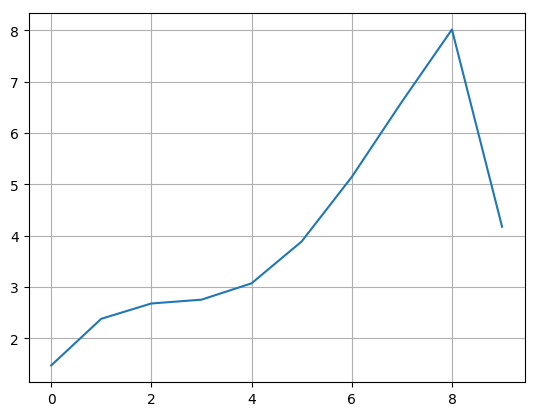

In [25]:
plot(solución1[2][150])
grid();

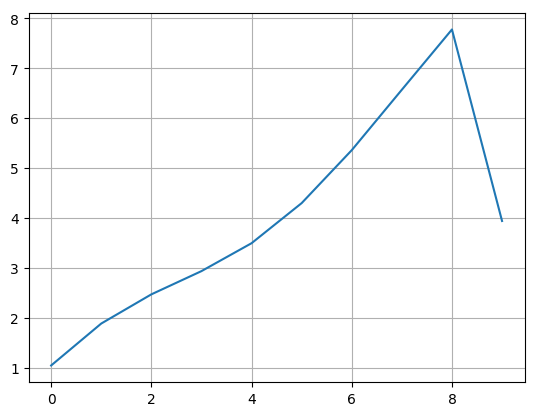

In [26]:
plot(solución1[2][250])
grid();

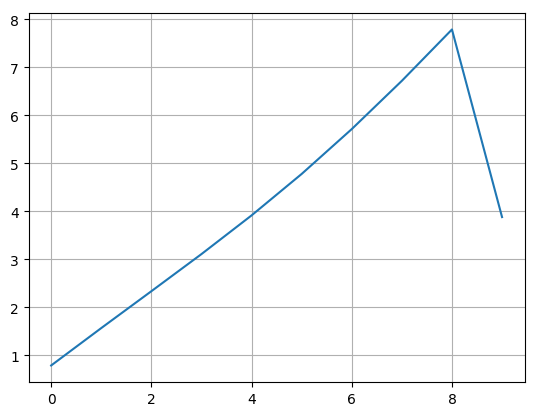

In [27]:
plot(solución1[2][550])
grid();

Podemos observar que en ambos métodos conforme va pasando el tiempo, la grafica tiende a un comportamiento lineal.